In [1]:
from fastai.text import *
import html
import torch.nn.functional as F
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
PATH = Path('/data2/translate/LM/data/wiki/fr/')

In [29]:
trn_df = pd.read_csv(PATH/'train.csv', header=None)

In [38]:
val_df = pd.read_csv(PATH/'val.csv', header=None)

In [39]:
val_df.head()

,0
0,Maxime Monfort\n\nMaxime Monfort est un coureu...
1,PEG\n\nPEG peut signifier :\n\nAutres signific...
2,Minamoto no Yoshitsune\n\nBiographie.\nJeuness...
3,Ferdinand Hodler\n\nFerdinand Hodler est un pe...
4,"Roger de Piles\n\nRoger de Piles, né à Clamecy..."


In [40]:
val_df['labels'] = [0]*len(val_df)

In [41]:
df = val_df[['labels', 0]]

In [42]:
df.head()

,labels,0
0,0,Maxime Monfort\n\nMaxime Monfort est un coureu...
1,0,PEG\n\nPEG peut signifier :\n\nAutres signific...
2,0,Minamoto no Yoshitsune\n\nBiographie.\nJeuness...
3,0,Ferdinand Hodler\n\nFerdinand Hodler est un pe...
4,0,"Roger de Piles\n\nRoger de Piles, né à Clamecy..."


In [43]:
df.to_csv(PATH/'val_csv.csv', index=False, header=None)

In [4]:
data_lm = text_data_from_csv(PATH, tokenizer=Tokenizer(lang='fr'), train='trn_csv', valid='val_csv', data_func=lm_data)

In [5]:
data_lm.train_dl.dl.bs = 32

In [6]:
data_lm.valid_dl.dl.bs = 32

In [12]:
ls {PATH}

models/  tmp/  train.csv  trn_csv.csv  val.csv  val_csv.csv


In [7]:
learn = RNNLearner.language_model(data_lm, drop_mult=0.5)

In [14]:
learn.lr_find()

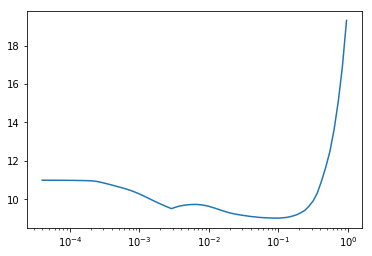

In [15]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, 1e-3)

In [12]:
learn.save('french-wiki-lm-1')

In [13]:
learn.save_encoder('french-wiki-lm-1-enc')